In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import csv

url_kwh = 'https://raw.githubusercontent.com/elianrichard/kwh_meter/master/data_kwh_2.csv'
url_libur = 'https://raw.githubusercontent.com/elianrichard/kwh_meter/master/data_libur_2.csv'
url_puasa = 'https://raw.githubusercontent.com/elianrichard/kwh_meter/master/data_puasa_2.csv'

# url_kwh = 'data_kwh_2.csv'
# url_libur = 'data_libur_2.csv'
# url_puasa = 'data_puasa_2.csv'

data_kwh = pd.read_csv(url_kwh)
data_libur = pd.read_csv(url_libur)
data_puasa = pd.read_csv(url_puasa)

In [2]:
# data_kwh, data_libur, data_puasa

# database_libur = np.empty((0, 4), int)

# for data in range(len(data_libur)):
#     database_libur = np.append(database_libur, np.array([[data_libur['Day'][data], data_libur['Month'][data], data_libur['Year'][data], data_libur['Ket'][data]]]), 0)
# for data in range(len(data_puasa)):
#     database_libur = np.append(database_libur, np.array([[data_puasa['Day'][data], data_puasa['Month'][data], data_puasa['Year'][data], 'Puasa']]), 0)

# print(database_libur)

In [3]:
# for data in range(len(database_libur)):
#     data_kwh.loc[(data_kwh["Day"] == int(database_libur[data][0])) & (data_kwh["Month"] == int(database_libur[data][1])) & (data_kwh["Year"] == int(database_libur[data][2])), "HariLibur"] = 1

In [4]:
# a = pd.DataFrame({"Date":["30-12-2019"], "Ket":["Liburrr"]})
# data_libur.append(a, ignore_index = True)

data_kwh['Date'] = pd.to_datetime(data_kwh['Date'], format='%d-%m-%Y')
data_libur['Date'] = pd.to_datetime(data_libur['Date'], format='%d-%m-%Y')
data_puasa['Date'] = pd.to_datetime(data_puasa['Date'], format='%d-%m-%Y')
# data_kwh['Hour'] = pd.to_datetime(data_kwh['Hour'], format='%H:%M:%S')

for i in range(len(data_libur)):
    data_kwh.loc[(data_kwh["Date"] == data_libur['Date'][i]), "HariLibur"] = 1
for i in range(len(data_puasa)):
    data_kwh.loc[(data_kwh["Date"] == data_puasa['Date'][i]), "BulanPuasa"] = 1
    
data_kwh.loc[(data_kwh['Date'].dt.weekday == 0) | (data_kwh['Date'].dt.weekday == 1) | (data_kwh['Date'].dt.weekday == 2) | (data_kwh['Date'].dt.weekday == 3) | (data_kwh['Date'].dt.weekday == 4), "Weekday"] = 1
data_kwh.loc[(data_kwh['Date'].dt.weekday == 5) | (data_kwh['Date'].dt.weekday == 6), "Weekend"] = 1
# data_kwh.head(5600)

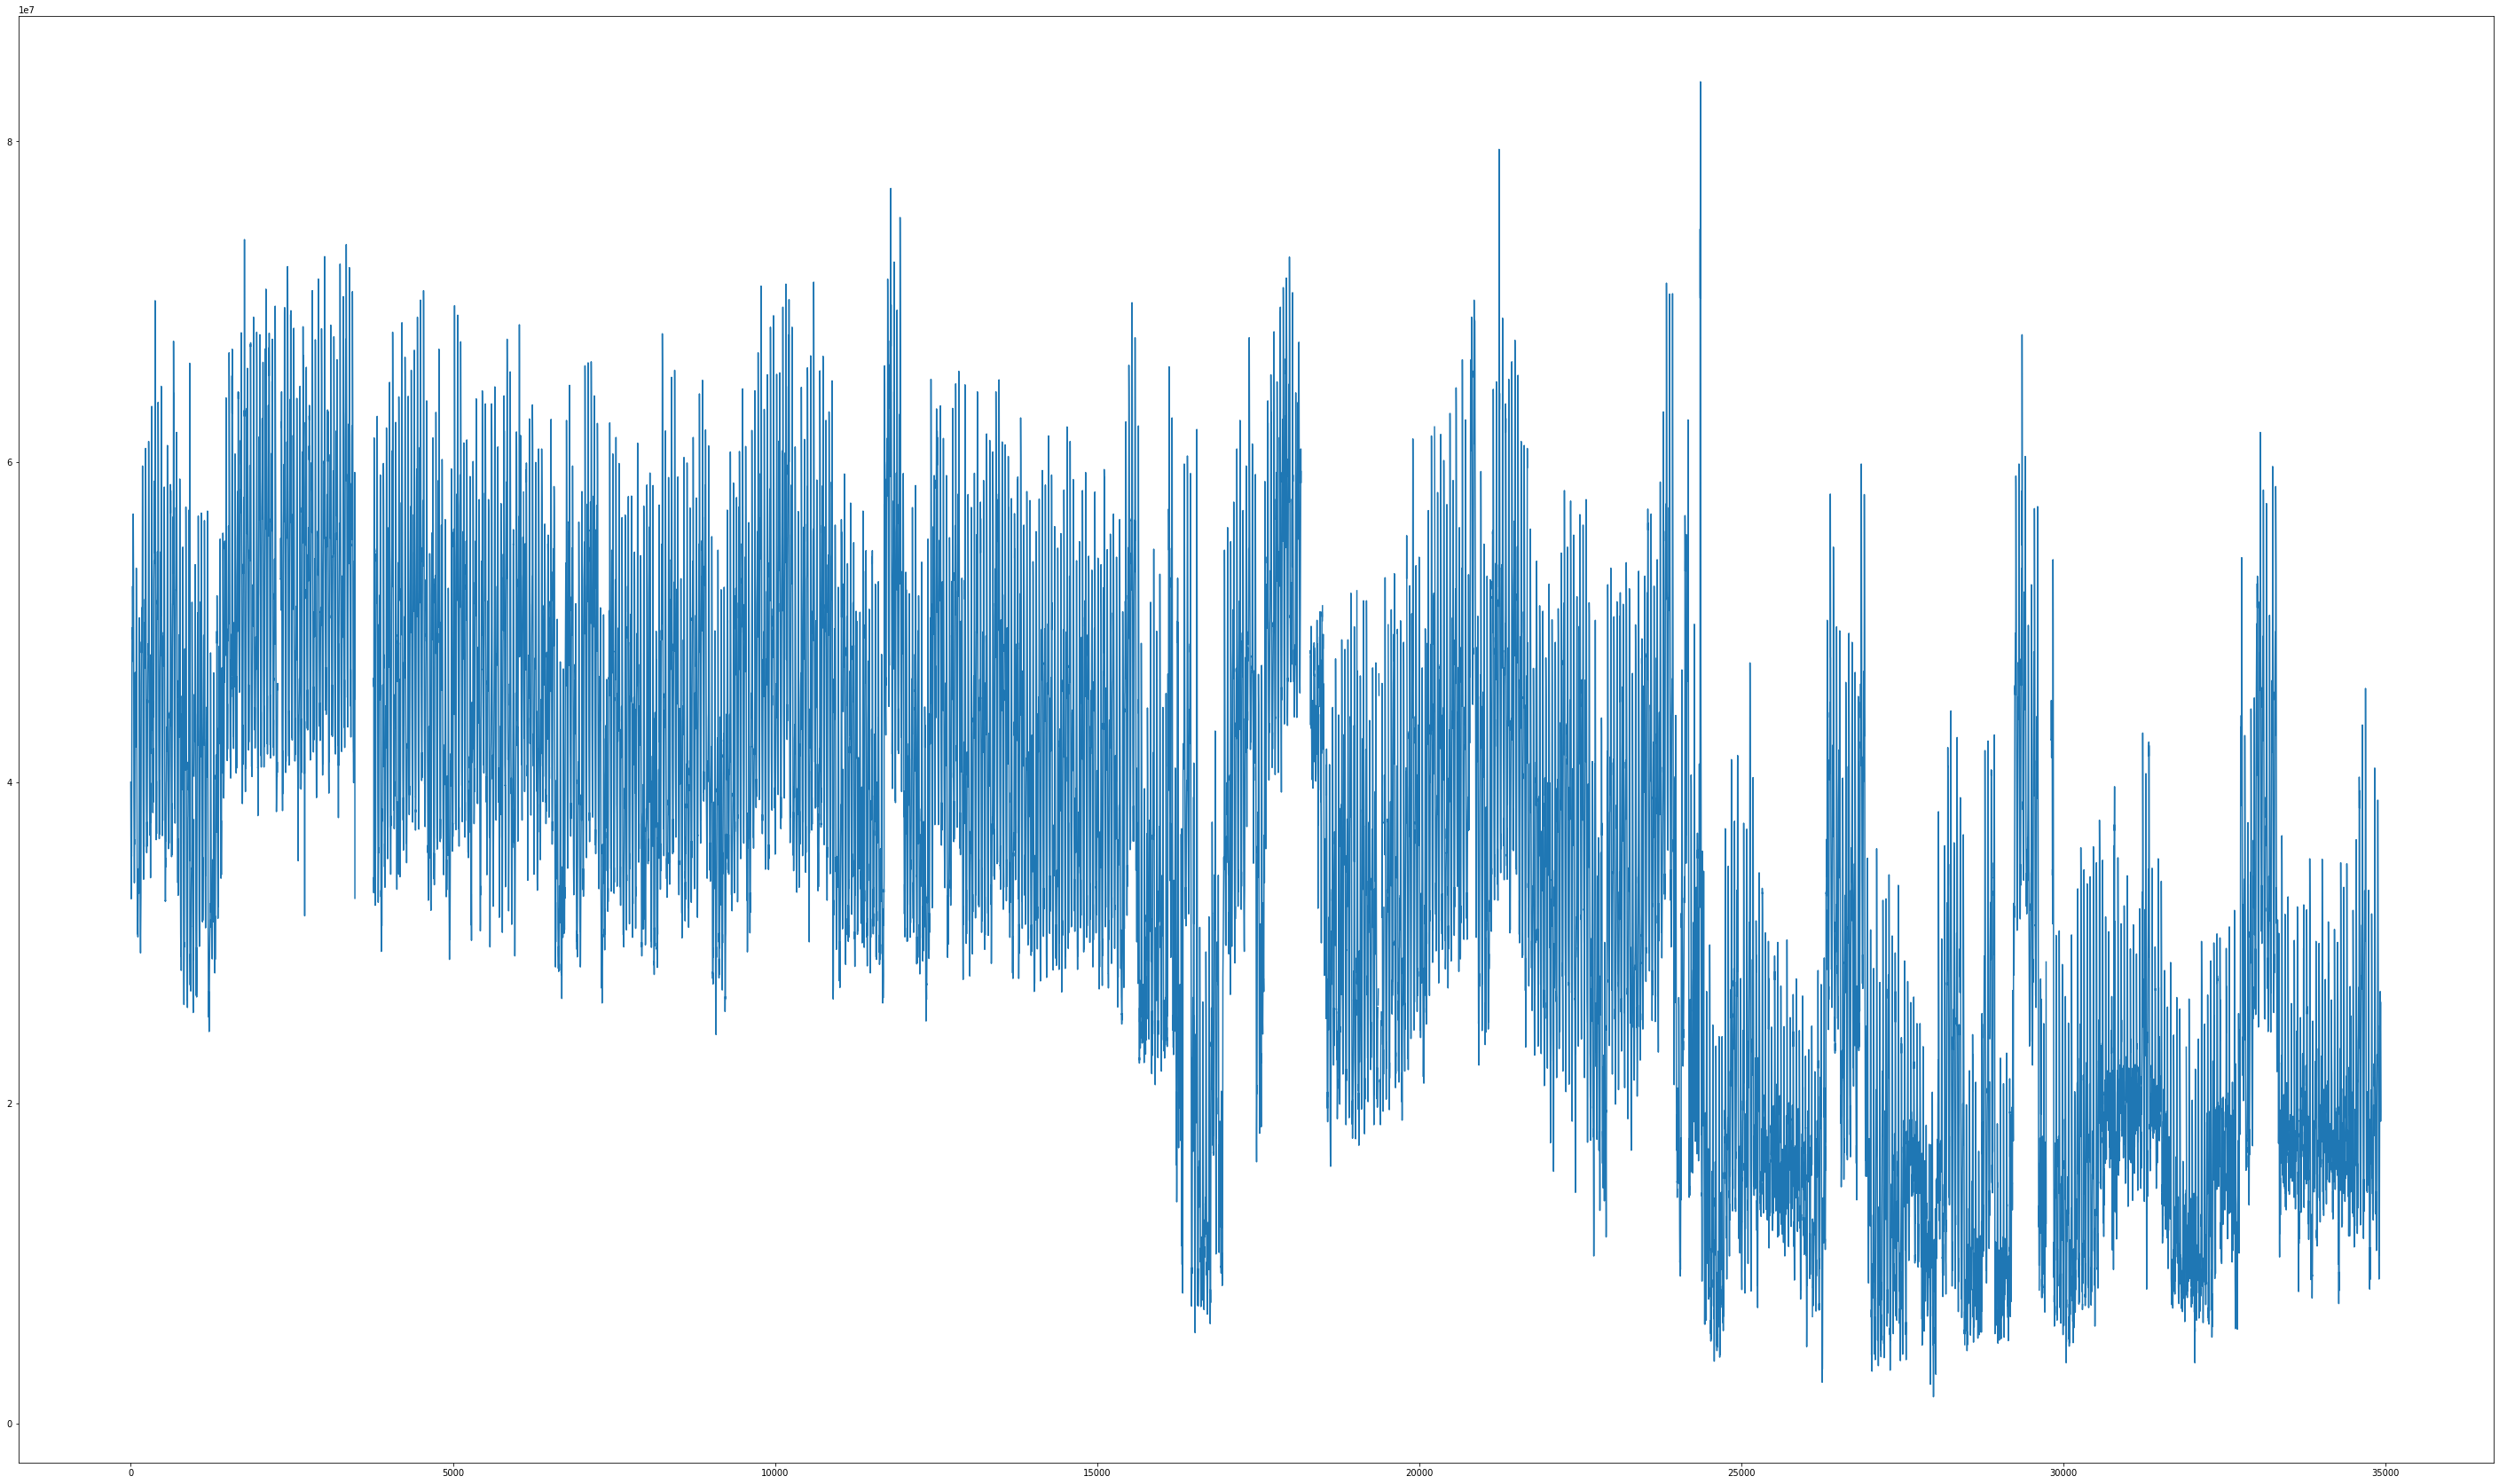

In [37]:
data_kwh_filtered = data_kwh[(data_kwh['ExportWhTotal'] > 0) & (data_kwh['ExportWhTotal'] < 900000000)]

# data_kwh_train.loc[(data_kwh_train['ExportWhTotal'] <= 0) | (data_kwh_train['ExportWhTotal'] > 90000000), 'ExportWhTotal'] = np.nan

y = data_kwh['ExportWhTotal'].tolist()

data_clean = []
data_48 = []
mean_48 = 0

# for data in range(len(y)):
#     if y[data] > 0:
#         if y[data] < 90000000:
#             if data <= 48:
#                 if data != 0:
#                     data_48.append(abs((y[data-1] - y[data])))
#                     mean_48 = (sum(data_48)*10)/len(data_48)
#                 data_clean.append(y[data])
#             else:
#                 if (data_48[len(data_48)-1]+mean_48 > y[data]) & (data_48[len(data_48)-1]-mean_48 < y[data]):
#                     data_clean.append(y[data])
#                     data_48.pop(0)
#                     data_48.append(abs((data_48[len(data_48)-1] - y[data])))
#                     mean_48 = (sum(data_48)*10)/len(data_48)
# #                     print(len(data_clean))
# #                     print((mean_48), "\n")
# #                     print(data_clean)
#                 else:
#                     data_clean.append(np.nan)
#         else:
#           data_clean.append(np.nan)
#     else:
#       data_clean.append(np.nan)

mul = 1.5

for data in range(len(y)):
    if y[data] > 0:
        if y[data] < 90000000:
            if data <= 48:
                data_48.append(y[data])
                data_clean.append(y[data])
            else:
                if ((np.max(data_48))*mul > y[data]) & ((np.min(data_48))/mul < y[data]):
                    data_clean.append(y[data])
                    data_48.pop(0)
                    data_48.append(y[data])
                else:
                    data_clean.append(np.nan)
        else:
          data_clean.append(np.nan)
    else:
      data_clean.append(np.nan)

x = list(range(0, len(y)))

# row = []
# i = 0
# for data2 in data_clean:
#   if i >24300:
#     if i < 24500:
#       row.append(data2)
#       #print (data2)
#   i += 1

# end_row = list(range(0, len(row)))

fig = plt.figure()
fig.set_figwidth(50)
fig.set_figheight(30)
p = plt.plot(x, data_clean)
# p = plt.plot(end_row, row)

data_kwh_filtered = data_kwh.copy()

for i in range(len(data_clean)):
    data_kwh_filtered.loc[data_kwh_filtered.index == i, 'ExportWhTotal'] = data_clean[i]

data_kwh_test = data_kwh_filtered.copy()
data_kwh_train = data_kwh_filtered.copy()

In [6]:
data_asli = []

for data in y:
    if data > 0:
        if data < 90000000:
            data_asli.append(data)
            
n = list(range(0, len(data_asli)))
fig = plt.figure()
fig.set_figwidth(50)
fig.set_figheight(30)
# plt.plot(n, data_asli)

<Figure size 3600x2160 with 0 Axes>

In [7]:
import random
random_arr = random.sample(range(0, len(data_kwh_train)), int(len(data_kwh_train)/10))

# print(random_arr)

for n in random_arr:
    data_kwh_train.loc[data_kwh_train.index == n, 'ExportWhTotal'] = np.nan

data_kwh_train.head(10)

,Date,Hour,ExportWhTotal,ImportWhTotal,Weekday,Weekend,HariLibur,MakanSiang,PulangKerja,JamTidur,Subuh,Pagi,Siang,Sore,Malam,TengahMalam,BulanPuasa
0,2019-12-30,0:00:00,40031250.0,0,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2019-12-30,0:30:00,38718750.0,0,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2019-12-30,1:00:00,37437500.0,0,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2019-12-30,1:30:00,NaN,0,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2019-12-30,2:00:00,34843750.0,0,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2019-12-30,2:30:00,33906250.0,0,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,2019-12-30,3:00:00,33281250.0,0,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,2019-12-30,3:30:00,32906250.0,0,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,2019-12-30,4:00:00,32750000.0,0,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,2019-12-30,4:30:00,33312500.0,0,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
#linear interpolation

array_kwh = data_kwh_train['ExportWhTotal'].to_numpy()
for i in range(len(array_kwh)):
    if np.isnan(array_kwh[i]):
        y0 = array_kwh[i-1]
        x0 = i-1
        j = 1
        while True:
            y1 = array_kwh[i+j]
            x1 = i+j
            if (~np.isnan(y1)):
                break
            j += 1
        result = ((y1-y0)/(x1-x0))+y0
        data_kwh_train.loc[data_kwh_train.index == i, 'ExportWhTotal'] = result

#polynomial interpolation

# plt.style.use('seaborn-poster')

# def divided_diff(x, y):
#     n = len(y)
#     coef = np.zeros([n, n])
#     coef[:,0] = y
    
#     for j in range(1,n):
#         for i in range(n-j):
#             coef[i][j] = \
#            (coef[i+1][j-1] - coef[i][j-1]) / (x[i+j]-x[i])
            
#     return coef

# def newton_poly(coef, x_data, x):
#     n = len(x_data) - 1 
#     p = coef[n]
#     for k in range(1,n+1):
#         p = coef[n-k] + (x -x_data[n-k])*p
#     return p

# x = data_kwh[(data_kwh['ExportWhTotal'] > 0) & (data_kwh['ExportWhTotal'] < 900000000)].head(10).index.tolist()
# y = data_kwh['ExportWhTotal'][(data_kwh['ExportWhTotal'] > 0) & (data_kwh['ExportWhTotal'] < 900000000)].head(10)

# a_s = divided_diff(x, y)[0, :]

# x_new = np.arange(1.5, 2.5, 7.5)
# y_new = newton_poly(a_s, x, x_new)

# plt.figure(figsize = (12, 8))
# plt.plot(x, y, 'bo')
# plt.plot(x_new, y_new)

# print(x)

In [9]:
data_kwh_train.head(10)

,Date,Hour,ExportWhTotal,ImportWhTotal,Weekday,Weekend,HariLibur,MakanSiang,PulangKerja,JamTidur,Subuh,Pagi,Siang,Sore,Malam,TengahMalam,BulanPuasa
0,2019-12-30,0:00:00,40031250.0,0,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2019-12-30,0:30:00,38718750.0,0,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2019-12-30,1:00:00,37437500.0,0,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2019-12-30,1:30:00,36140625.0,0,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2019-12-30,2:00:00,34843750.0,0,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2019-12-30,2:30:00,33906250.0,0,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,2019-12-30,3:00:00,33281250.0,0,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,2019-12-30,3:30:00,32906250.0,0,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,2019-12-30,4:00:00,32750000.0,0,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,2019-12-30,4:30:00,33312500.0,0,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
#error checking

err_nan = np.empty(len(data_kwh_train))
err_nan[:] = 0

err_obj = {'Initial': data_kwh_test['ExportWhTotal'].to_numpy(), 'Prediction': data_kwh_train['ExportWhTotal'].to_numpy(), 'Error (%)': err_nan}
err_df = pd.DataFrame(err_obj)

# for i in range(len(err_df)):
for i in random_arr:
    a = err_df['Initial'][i]
    b = err_df['Prediction'][i]
    error = abs((b-a)*100/a)
    err_df.loc[err_df.index == i, 'Error (%)'] = error
    
err_df.head(10)

,Initial,Prediction,Error (%)
0,40031250.0,40031250.0,0.000000
1,38718750.0,38718750.0,0.000000
2,37437500.0,37437500.0,0.000000
3,36000000.0,36140625.0,0.390625
4,34843750.0,34843750.0,0.000000
5,33906250.0,33906250.0,0.000000
6,33281250.0,33281250.0,0.000000
7,32906250.0,32906250.0,0.000000
8,32750000.0,32750000.0,0.000000
9,33312500.0,33312500.0,0.000000


In [11]:
err_df.describe()

,Initial,Prediction,Error (%)
count,3.433900e+04,3.119600e+04,34040.000000
mean,3.522421e+07,3.523287e+07,0.315595
std,1.525223e+07,1.525563e+07,5.507349
min,7.812500e+05,7.812500e+05,0.000000
25%,2.300000e+07,2.294922e+07,0.000000
50%,3.615625e+07,3.618750e+07,0.000000
75%,4.650000e+07,4.650000e+07,0.000000
max,3.540625e+08,3.540625e+08,603.555556


In [12]:
a = err_df[err_df['Error (%)'] > 0].index.tolist()
print(a)

[3, 23, 24, 36, 39, 62, 65, 82, 84, 85, 86, 99, 109, 115, 125, 133, 140, 148, 164, 172, 173, 184, 185, 198, 206, 217, 226, 227, 234, 235, 242, 244, 262, 271, 277, 292, 294, 299, 311, 330, 353, 373, 388, 401, 416, 435, 442, 444, 448, 450, 454, 457, 475, 477, 485, 492, 506, 526, 539, 554, 563, 568, 607, 619, 627, 634, 641, 649, 682, 690, 691, 698, 713, 729, 736, 765, 774, 782, 787, 791, 795, 797, 804, 806, 820, 831, 834, 835, 890, 891, 909, 912, 914, 924, 926, 941, 946, 947, 950, 951, 957, 959, 961, 964, 991, 1012, 1032, 1034, 1045, 1055, 1063, 1072, 1078, 1087, 1091, 1103, 1110, 1113, 1123, 1127, 1133, 1145, 1147, 1152, 1156, 1157, 1159, 1164, 1170, 1175, 1181, 1187, 1191, 1196, 1241, 1268, 1279, 1292, 1295, 1311, 1334, 1352, 1353, 1356, 1357, 1373, 1383, 1391, 1396, 1406, 1423, 1424, 1429, 1453, 1454, 1459, 1467, 1469, 1509, 1517, 1518, 1519, 1522, 1527, 1529, 1541, 1558, 1575, 1591, 1596, 1603, 1604, 1605, 1609, 1626, 1629, 1634, 1637, 1647, 1669, 1670, 1725, 1740, 1781, 1791, 1805, 1